# Import Packages

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Problem 1

In [2]:
data_1 = {'Decade': [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980],
          'Percent Complete': [72.7, 63.4, 50.0, 44.3, 41.6,
                               32.8, 27.2, 22.5, 13.3]}
df_1 = pd.DataFrame(data_1)
df_1 = sm.add_constant(df_1)

endog_1 = df_1['Percent Complete'] / 100
exog_1 = df_1[['const', 'Decade']]

## Problem 1a

### Linear Probability Model

In [3]:
lpm_mod = sm.GLM(endog_1, exog_1,
                 family = sm.families.Binomial(sm.families.links.identity()))
lpm_res = lpm_mod.fit()
print(lpm_res.summary2())

              Results: Generalized linear model
Model:              GLM              AIC:            11.2715 
Link Function:      identity         BIC:            -15.3531
Dependent Variable: Percent Complete Log-Likelihood: -3.6357 
Date:               2021-07-21 21:22 LL-Null:        -4.2644 
No. Observations:   9                Deviance:       0.027466
Df Model:           1                Pearson chi2:   0.0274  
Df Residuals:       7                Scale:          1.0000  
Method:             IRLS                                     
--------------------------------------------------------------
           Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
--------------------------------------------------------------
const     13.8784   10.5666   1.3134  0.1890  -6.8317  34.5885
Decade    -0.0069    0.0054  -1.2782  0.2012  -0.0176   0.0037



/Users/jmiller/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning: The identity link function does not respect the domain of the Binomial family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/Users/jmiller/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning: The identity link function does not respect the domain of the Binomial family.
  warnings.warn((f"The {type(family.link).__name__} link function "


### Logistic Regression Model

In [4]:
logit_mod = sm.GLM(endog_1, exog_1,
                   family = sm.families.Binomial(sm.families.links.logit()))
logit_res = logit_mod.fit()
print(logit_res.summary2())

              Results: Generalized linear model
Model:              GLM              AIC:            11.2727 
Link Function:      logit            BIC:            -15.3519
Dependent Variable: Percent Complete Log-Likelihood: -3.6363 
Date:               2021-07-21 21:22 LL-Null:        -4.2644 
No. Observations:   9                Deviance:       0.028640
Df Model:           1                Pearson chi2:   0.0285  
Df Residuals:       7                Scale:          1.0000  
Method:             IRLS                                     
--------------------------------------------------------------
         Coef.   Std.Err.     z     P>|z|    [0.025    0.975] 
--------------------------------------------------------------
const   60.7428   58.3444   1.0411  0.2978  -53.6101  175.0957
Decade  -0.0315    0.0301  -1.0466  0.2953   -0.0906    0.0275



### Probit Model

In [5]:
probit_mod = sm.GLM(endog_1, exog_1,
                    family = sm.families.Binomial(sm.families.links.probit()))
probit_res = probit_mod.fit()
print(probit_res.summary2())

              Results: Generalized linear model
Model:              GLM              AIC:            11.2714 
Link Function:      probit           BIC:            -15.3532
Dependent Variable: Percent Complete Log-Likelihood: -3.6357 
Date:               2021-07-21 21:22 LL-Null:        -4.2644 
No. Observations:   9                Deviance:       0.027371
Df Model:           1                Pearson chi2:   0.0273  
Df Residuals:       7                Scale:          1.0000  
Method:             IRLS                                     
--------------------------------------------------------------
         Coef.   Std.Err.     z     P>|z|    [0.025    0.975] 
--------------------------------------------------------------
const   37.1663   34.4110   1.0801  0.2801  -30.2782  104.6107
Decade  -0.0193    0.0178  -1.0864  0.2773   -0.0541    0.0155



### Ordinary Least Squares Regression

In [6]:
ols_mod = sm.OLS(endog_1, exog_1)
ols_res = ols_mod.fit()
print(ols_res.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.976     
Dependent Variable: Percent Complete AIC:                -35.9471  
Date:               2021-07-21 21:22 BIC:                -35.5527  
No. Observations:   9                Log-Likelihood:     19.974    
Df Model:           1                F-statistic:        326.5     
Df Residuals:       7                Prob (F-statistic): 3.93e-07  
R-squared:          0.979            Scale:              0.00088925
---------------------------------------------------------------------
            Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const      13.9046     0.7469    18.6158   0.0000   12.1384   15.6708
Decade     -0.0070     0.0004   -18.0703   0.0000   -0.0079   -0.0060
-------------------------------------------------------------------
Omnibus:              0.536         Durbin-Watson:      

/Users/jmiller/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Problem 1b

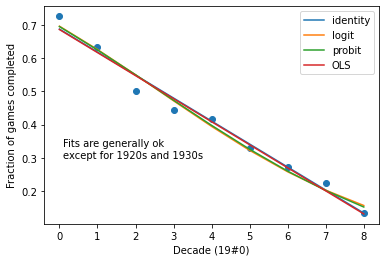

In [7]:
for model in [lpm_res, logit_res, probit_res]:
    plt.plot(range(len(model.predict())),
             model.predict(),
             label = str(model.family.link).split('.')[-1].split(' ')[0])
plt.plot(range(len(ols_res.predict())), ols_res.predict(), label = 'OLS')
plt.scatter(range(len(df_1['Percent Complete'])),
            df_1['Percent Complete'] / 100)
plt.xlabel('Decade (19#0)')
plt.ylabel('Fraction of games completed')
plt.legend()
plt.text(0.1, 0.3, 'Fits are generally ok\nexcept for 1920s and 1930s')
plt.show()

## Problem 1c

In [8]:
for model in [lpm_res, logit_res, probit_res, ols_res]:
    predict = model.predict([[1, 1990], [1, 2000], [1, 2010]])
    try:
        print('--- {} ---'.format(
            str(model.family.link).split('.')[-1].split(' ')[0]))
    except AttributeError:
        print('--- OLS ---')
    [print('{}: {}'.format(year, round(predict[pred], 4)))
     for pred, year in enumerate([1990, 2000, 2010])]
    if (predict > 0).all():
        print('Plausible because yields all positive but decreasing values')
    print()

--- identity ---
1990: 0.0636
2000: -0.0059
2010: -0.0753

--- logit ---
1990: 0.1187
2000: 0.0895
2010: 0.0669
Plausible because yields all positive but decreasing values

--- probit ---
1990: 0.1105
2000: 0.0783
2010: 0.0537
Plausible because yields all positive but decreasing values

--- OLS ---
1990: 0.0608
2000: -0.0087
2010: -0.0783



## Problem 2

D = duration of surgery in minutes
T = type of device (0 = laryngeal mask airway, 1 = tracheal tube)
Y = sore throat (0 = no, 1 = yes)

In [9]:
data_2 = {'Patient': range(1, 36),
          'D': [45, 15, 40, 83, 90, 25, 35, 65, 95, 35, 75, 45,
                50, 75, 30, 25, 20, 60, 70, 30, 60, 61, 65, 15,
                20, 45, 15, 25, 15, 30, 40, 15, 135, 20, 40],
          'T': [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
                1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
                1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1],
          'Y': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
                0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0]}

df_2 = pd.DataFrame(data_2)
df_2 = sm.add_constant(df_2)

endog_2 = df_2['Y']
exog_2 = df_2[['const', 'D', 'T']]

## Problem 2a

In [10]:
logit_mod_2 = sm.GLM(endog_2, exog_2,
                     family = sm.families.Binomial(sm.families.links.logit()))
logit_res_2 = logit_mod_2.fit()
print(logit_res_2.summary2())
print('-- Pearson --\nValue / DoF = {} / {} = {}'.format(
    round(logit_res_2.pearson_chi2, 3),
    logit_res_2.df_resid,
    round(logit_res_2.pearson_chi2 / logit_res_2.df_resid, 3)))
print('\n-- Deviance --\nValue / DoF = {} / {} = {}'.format(
    round(logit_res_2.deviance, 3),
    logit_res_2.df_resid,
    round(logit_res_2.deviance / logit_res_2.df_resid, 3)))
print('\nBoth close to 1, therefore fit is ok')

              Results: Generalized linear model
Model:              GLM              AIC:            36.1379 
Link Function:      logit            BIC:            -83.6332
Dependent Variable: Y                Log-Likelihood: -15.069 
Date:               2021-07-21 21:22 LL-Null:        -23.090 
No. Observations:   35               Deviance:       30.138  
Df Model:           2                Pearson chi2:   37.0    
Df Residuals:       32               Scale:          1.0000  
Method:             IRLS                                     
--------------------------------------------------------------
            Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
--------------------------------------------------------------
const      -1.4173    1.0946  -1.2949  0.1954  -3.5627  0.7280
D           0.0687    0.0264   2.6002  0.0093   0.0169  0.1204
T          -1.6589    0.9229  -1.7976  0.0722  -3.4677  0.1498

-- Pearson --
Value / DoF = 36.955 / 32 = 1.155

-- Deviance --
Value / DoF =

## Problem 2b

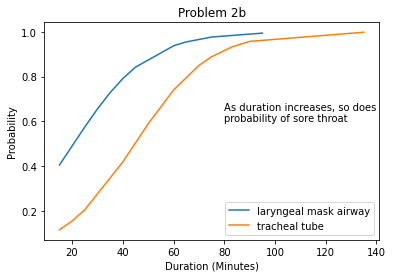

In [11]:
df_2['Predicted'] = logit_res_2.predict()
df_2 = df_2.sort_values('D')
x_0 = df_2[df_2['T'] == 0]
x_1 = df_2[df_2['T'] == 1]

plt.plot(x_0['D'], x_0['Predicted'], label = 'laryngeal mask airway')
plt.plot(x_1['D'], x_1['Predicted'], label = 'tracheal tube')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Probability')
plt.title('Problem 2b')
plt.legend()
plt.text(80, 0.6, 'As duration increases, so does\nprobability of sore throat')
plt.show()

## Problem 2c

In [12]:
conf_int = logit_res_2.conf_int()
conf_int.columns = ['5%', '95%']
conf_int['Odds Ratio'] = logit_res_2.params
conf_int = np.exp(conf_int)
print(conf_int)
print()

print('For 10 minute increase, a person is between {} and {} times as likely '
      'to get sore throat.'.format(round(conf_int['5%']['D'], 2),
                                   round(conf_int['95%']['D'], 2)))

             5%       95%  Odds Ratio
const  0.028362  2.070998    0.242358
D      1.017054  1.127999    1.071091
T      0.031188  1.161646    0.190339

For 10 minute increase, a person is between 1.02 and 1.13 times as likely to get sore throat.


## Problem 2d

In [13]:
print('A person who had a sore throat after surgery is between {} and {} '
      'times as likely to have received a tracheal tube instead of a '
      'laryngeal mask airway.'.format(round(conf_int['5%']['T'], 2),
                                      round(conf_int['95%']['T'], 2)))

A person who had a sore throat after surgery is between 0.03 and 1.16 times as likely to have received a tracheal tube instead of a laryngeal mask airway.


## Problem 2e

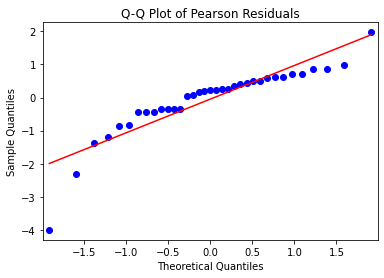

Pearson residuals:
0    -2.308457
1    -0.823998
2     0.514333
3     0.269286
4     0.211749
5     1.973232
6     0.610675
7     0.217979
8     0.077807
9     0.610675
10    0.154626
11    0.992920
12   -1.195781
13    0.354420
14   -1.379190
15    0.860879
16   -0.426831
17    0.593221
18    0.420809
19    0.725063
20    0.258810
21   -3.998830
22    0.217979
23   -0.359493
24   -0.426831
25    0.433190
26   -0.359493
27    0.860879
28   -0.359493
29    0.725063
30    0.514333
31   -0.359493
32    0.045157
33   -0.426831
34   -0.848242
dtype: float64

Based on residuals and Q-Q plot, it appears there are some issues at extreme values, but middle region looks ok.


In [14]:
sm.qqplot(logit_res_2.resid_pearson, line = 'r')
plt.title('Q-Q Plot of Pearson Residuals')
plt.show()

print('Pearson residuals:\n{}\n'.format(logit_res_2.resid_pearson))
print('Based on residuals and Q-Q plot, it appears there are some issues at '
      'extreme values, but middle region looks ok.')

## Problem 2f

Goodness of fit suggests this model is good. Residuals are not obviously perfect, showing some issues at extremes, but otherwise are mostly ok. Therefore this model is probably ok.

# Problem 3

In [15]:
df_3 = pd.read_excel('/Users/jmiller/Google Drive/RIT/'
                     'STAT.784 - Categorical Data Analysis/umaru.xlsx')

## Problem 3a

IV Drug Use History at Admission is qualitative. We can code these 3 levels (1 = Never, 2 = Previous, 3 = Recent) by using 2 dummy variables.

## Problem 3b

In [16]:
df_3 = df_3.join(pd.get_dummies(df_3['ivhx'],
                                prefix = 'ivhx',
                                drop_first = True))
df_3 = df_3.drop(['ivhx'], axis = 1)

endog_3 = df_3['dfree']
exog_3 = df_3[['age', 'beck', 'ndrugtx', 'race', 'treat', 'site', 'ivhx_2',
               'ivhx_3']]

logit_mod_3 = sm.GLM(endog_3, exog_3,
                     family = sm.families.Binomial(sm.families.links.logit()))
logit_res_3 = logit_mod_3.fit()
print(logit_res_3.summary2())

print('-- Pearson --\nValue / DoF = {} / {} = {}'.format(
    round(logit_res_3.pearson_chi2, 3),
    logit_res_3.df_resid,
    round(logit_res_3.pearson_chi2 / logit_res_3.df_resid, 3)))
print('\n-- Deviance --\nValue / DoF = {} / {} = {}'.format(
    round(logit_res_3.deviance, 3),
    logit_res_3.df_resid,
    round(logit_res_3.deviance / logit_res_3.df_resid, 3)))
print('\nBoth close to 1, therefore fit is ok')

               Results: Generalized linear model
Model:              GLM              AIC:            651.9921  
Link Function:      logit            BIC:            -2966.9357
Dependent Variable: dfree            Log-Likelihood: -318.00   
Date:               2021-07-21 21:22 LL-Null:        -326.86   
No. Observations:   575              Deviance:       635.99    
Df Model:           7                Pearson chi2:   588.      
Df Residuals:       567              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
age         -0.0118    0.0082  -1.4313  0.1523  -0.0279   0.0044
beck        -0.0162    0.0100  -1.6297  0.1032  -0.0358   0.0033
ndrugtx     -0.0618    0.0257  -2.4078  0.0160  -0.1122  -0.0115
race         0.1901    0.2220   0.8561  0.3919  -

## Problem 3c

Race parameter interval includes 0, therefore unclear how much race would contribute to final prediction. I would likely remove this variable from the final model.

## Problem 3d

The interval for IVHX 2 vs 1 includes 0, therefore I would likely drop this from model. However, IVHX 3 vs 1 clearly has a negative impact on final prediction.
